# Creation of the Small World Network

In [1]:
import networkx as nx
import numpy as np
import pickle
from random import randint
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
from tqdm.notebook import trange, tqdm
from time import time
from ipywidgets import interact, fixed
from scipy import optimize

import seaborn as sns
sns.set()

import os, sys
currentdir = os.path.dirname(os.path.realpath(__name__))
scriptsdir = os.path.dirname(currentdir)+'/scripts'
sys.path.append(scriptsdir)

from distances import dist_1d, dist_2d_lattice, dist_2d_spacial
from random_walks import simple_2d_random_walk, lazy_2d_random_walk
from generate_graph import Kleinberg_2d, small_world_2d, small_world_2d_new, sparse_lattice_graph
from analysis import get_path_forG, increase_walks_forG, get_new_start, get_mixing_time, get_prob_distribution,increase_prob_distribution, get_L1_norm_over_step_count, get_L1_norm
from plots_library import plot_2d_graph, plot_walk

Our task is to simulate a small world network, the probability matrix is defined as follows
\begin{equation}
P(u,v)={\text{dist}(u,v)^{-r}\over Z} \qquad Z=\sum_{y\neq u, \text{dist}(u,y)\geq 2}\text{dist}(u,y)^{-r}
\end{equation}
This graph is therefore represented by two number $G(N,r)$ and it has a geometric structur of a torus $T=\{1,\dots,N\}^2$.

The distance is defined as follow, with this notation of the vertices $u=(u_1,u_2)\in \{1,\dots,N\}^2$
\begin{equation}
	\text{dist}(u,v)=d_N(|u_1-v_1|)+d_N(|u_2-v_2|)
\end{equation}
and $d_N$ is the one dimensional distance over a circular graph
\begin{equation}
	d_N(i)=\begin{cases}i \quad 0\leq i<N/2\\
	N-i\quad N/2\leq i\leq N
	\end{cases}
\end{equation}
We have to start from a periodic 2d lattice

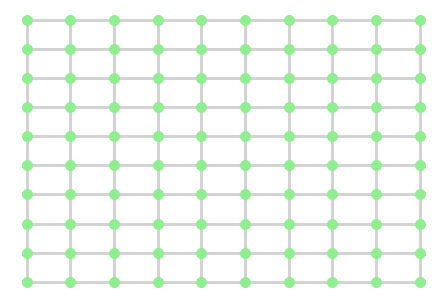

In [2]:
# Construction of a 2D periodic graph
L=10
G = nx.grid_2d_graph(L,L, periodic=True)
plot_2d_graph(G)

At this point we can insert randomly the long range edges

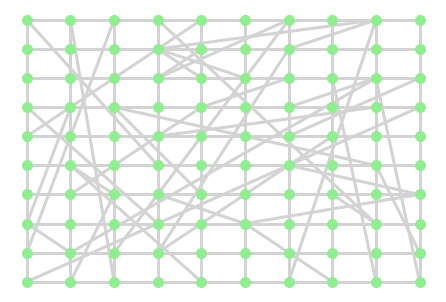

In [4]:
# Construction of the small world network r=1
L=10
r=1
G = small_world_2d_new(L,r)
plot_2d_graph(G)

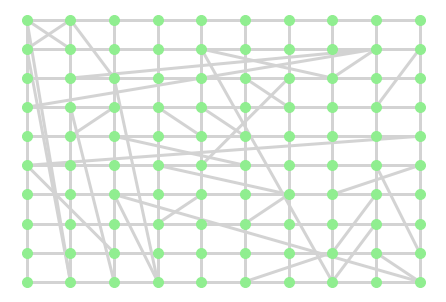

In [5]:
# Construction of the small world network r=3
L=10
r=3
G = small_world_2d_new(L,r)
plot_2d_graph(G)

We can see that for different $r$ parameter, which describes the number of long range interaction, the number of edges varies.

# The random walks

In our analysis we have used two types of random walks. In the following $d_v$ indicates the degree of the node v, i.e. the number of edges connected to the node v, and $E$ the set of the all edges of the graph.

    -) The simple random walk
    
Where the probability to jump to another nodes through a connecting edge is equally distributed.
\begin{equation}
    P(v,w)={1\over d_v}\qquad \text{if } (v,w)\in E 
\end{equation}

    -) The lazy random walk
    
Where we have half probability of staying in the same nodes and rest of having a simple random jump.
\begin{equation}
    P(v,w)=\begin{cases} {1\over 2} \qquad \text{if } w=v\\
    {1\over 2 d_v} \,\,\quad \text{if } (v,w)\in E\\
    0 \qquad \text{otherwise}
    \end{cases}
\end{equation}
    


In the graphs we have a red node as indicator of the starting node and a blue node as indicator of the end node.

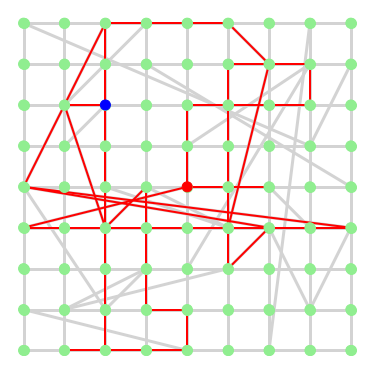

In [14]:
# simple random path
max_steps=50
L=9
r=2
G = small_world_2d_new(L,r)
path = simple_2d_random_walk(G,L,max_steps, start_node=(4,4))
plot_walk(G,L,path)

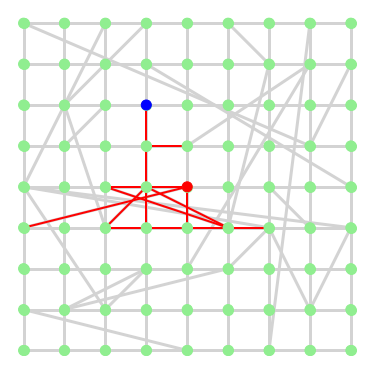

In [15]:
# lazy random path
path = lazy_2d_random_walk(G,L,max_steps, start_node=(4,4))
plot_walk(G,L,path)

We can see clearly that a simple random walk moves faster than a lazy one.